In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import tensor
%matplotlib inline

In [32]:
#Loading the dataset
data = pd.read_csv("sales_exp.csv")

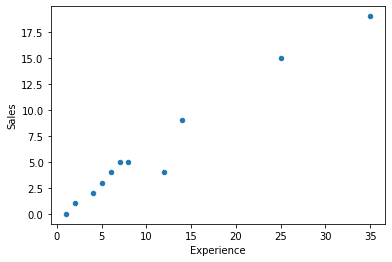

In [33]:
#Plotting the Dataset
data.plot(kind = 'scatter', x = 'Experience', y = 'Sales')

In [34]:
W = torch.nn.Parameter(tensor([1., -1.])) #nn is a lib. We create a tensor with random weights. Parameter means it'll calc gradients

In [35]:
data[1:]

,Sales,Experience
1,3,5
2,19,35
3,2,4
4,5,8
5,5,7
6,4,12
7,4,6
8,15,25
9,9,14
10,1,2


In [36]:
x = torch.tensor(data.values).float()

In [41]:
x = x[1:] #to get rid of first column that is added instead of headings (it was 1 and 0)

In [42]:
x.shape

torch.Size([10, 2])

In [43]:
x[1:,0]

tensor([19.,  2.,  5.,  5.,  4.,  4., 15.,  9.,  1.])

In [44]:
x[:,1].uniform_(1)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [45]:
x

tensor([[ 3.,  1.],
        [19.,  1.],
        [ 2.,  1.],
        [ 5.,  1.],
        [ 5.,  1.],
        [ 4.,  1.],
        [ 4.,  1.],
        [15.,  1.],
        [ 9.,  1.],
        [ 1.,  1.]])

In [46]:
y = torch.tensor(data.values).float()
y[1:,1]

tensor([ 5., 35.,  4.,  8.,  7., 12.,  6., 25., 14.,  2.])

In [47]:
y.shape

torch.Size([11, 2])

In [48]:
y = y[1:,1]

In [49]:
y

tensor([ 5., 35.,  4.,  8.,  7., 12.,  6., 25., 14.,  2.])

In [50]:
def linear(x, W): #linear regression
  return x@W

In [51]:
y_hat = linear(x, W)

In [52]:
x

tensor([[ 3.,  1.],
        [19.,  1.],
        [ 2.,  1.],
        [ 5.,  1.],
        [ 5.,  1.],
        [ 4.,  1.],
        [ 4.,  1.],
        [15.,  1.],
        [ 9.,  1.],
        [ 1.,  1.]])

In [53]:
y

tensor([ 5., 35.,  4.,  8.,  7., 12.,  6., 25., 14.,  2.])

In [54]:
linear(x, W).shape

torch.Size([10])

In [55]:
def mse(y_hat, y_true): #loss func
  return ((y_hat - y_true)**2).mean()

In [56]:
loss = mse(y_hat, y)

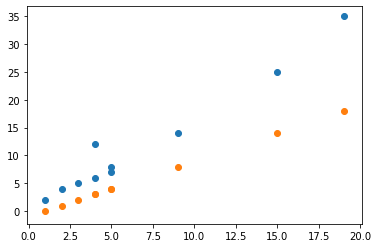

In [58]:
y_h = linear(x, W).detach() #for matplotlib
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_h) #our linear regression prediction before learning (random weights)

**Gradient Descent**

In [59]:
learning_rate = 0.1
#Forward pass
y_hat = linear(x, W)
loss = mse(y_hat, y)

loss.backward() #gradient calc for all parameters

#Gradient descent

with torch.no_grad(): 
  W -= learning_rate * W.grad
  W.grad.zero_()

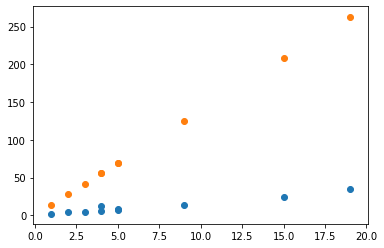

In [60]:
y_h = linear(x, W).detach() #for matplotlib
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_h) #our linear regression prediction before learning (random weights)

In [61]:
def train():
  
  #Forward pass
  y_hat = linear(x, W)
  loss = mse(y_hat, y)

  loss.backward() #gradient calc for all parameters
  print (loss)
  
  #Gradient descent

  with torch.no_grad(): 
    W.sub_(learning_rate * W.grad)
    W.grad.zero_()
  return y_hat.detach()


In [66]:
learning_rate = 0.005
W = torch.nn.Parameter(tensor([0.5, -1.])) #nn is a lib. We create a tensor with random weights. Parameter means it'll calc gradients

EPOCHS = 100
for i in range(EPOCHS):
  train()

tensor(141.5750, grad_fn=<MeanBackward0>)
tensor(11.5117, grad_fn=<MeanBackward0>)
tensor(4.5631, grad_fn=<MeanBackward0>)
tensor(4.1889, grad_fn=<MeanBackward0>)
tensor(4.1658, grad_fn=<MeanBackward0>)
tensor(4.1614, grad_fn=<MeanBackward0>)
tensor(4.1581, grad_fn=<MeanBackward0>)
tensor(4.1549, grad_fn=<MeanBackward0>)
tensor(4.1517, grad_fn=<MeanBackward0>)
tensor(4.1485, grad_fn=<MeanBackward0>)
tensor(4.1453, grad_fn=<MeanBackward0>)
tensor(4.1422, grad_fn=<MeanBackward0>)
tensor(4.1391, grad_fn=<MeanBackward0>)
tensor(4.1360, grad_fn=<MeanBackward0>)
tensor(4.1330, grad_fn=<MeanBackward0>)
tensor(4.1299, grad_fn=<MeanBackward0>)
tensor(4.1269, grad_fn=<MeanBackward0>)
tensor(4.1240, grad_fn=<MeanBackward0>)
tensor(4.1210, grad_fn=<MeanBackward0>)
tensor(4.1181, grad_fn=<MeanBackward0>)
tensor(4.1152, grad_fn=<MeanBackward0>)
tensor(4.1123, grad_fn=<MeanBackward0>)
tensor(4.1094, grad_fn=<MeanBackward0>)
tensor(4.1066, grad_fn=<MeanBackward0>)
tensor(4.1038, grad_fn=<MeanBackward0

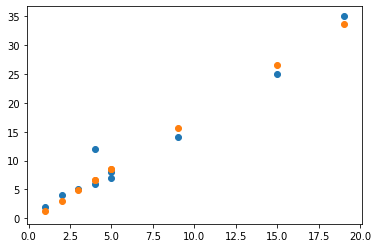

In [67]:
y_h = linear(x, W).detach() #for matplotlib
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_h) #our linear regression prediction before learning (random weights)